# -*- coding: utf-8 -*-
# NEO Zadatak



Date: 24.11.2024.

Author: Dragoljub Perišić

NoteBook broj 1: Klasifikacija NEO objekata u 4 kategorije pomoću mašinskog učenja
Opis:

Elementi koji se učitavaju za svako telo: 1 Argument of Perihelion -PEmaloomega -degree 2 Ascending Node -PEvelikoOmega -degree 3 Inclination -PEi -degree 4 Eccentricity -PEe - 5 Perihelion Distance -PEq -AU 6 Semimajor Axis -PEa -AU 7 Mean Anomaly -PEM -degree 8 Mean Daily Motion -PEn -degree/day 9 Aphelion Distance -PEQ -AU 10 Period -PEP -years 11 Absolute magnitude učitani objekti iz fajl: Set005NEOs36524.csv se filtriraju (a < 4 AU)

potom se grafički predstavljaju: a vs i a vs e

objekti se dele u 4 liste (Kategorije) MylistOfAmor MylistOfApollo MylistOfAtens Mylist preklapanja

grafički se prikazuje : a vs e za sve 4 kategoriatim se koristi je zajedno

zRandom chine (RBF SVM)

za podelu podataka u 4 kategorije.

Tela , kao i oblasti se grafički predstavljaju na poslednjeju se proverava pripadnost tela datim klasterima za 18000 telaerima za 4 date tačke




Created on Nov 16  2024
author: Dragoljub Perisic
postupak koji generiÅ¡e fajl za primer
1. 
https://minorplanetcenter.net/db_search/
primer sadrÅ¾i objekte
upit na sajtu
NEOs (Show)
na dana 14.11.2024. 36524 objekata
sa sajta, posle upita, prebaceno u Excel
pa posle iz Excela u CSV (DOS)
file name :
Set005NEOs36524.csv
btw: isti upit na dan 16.11.2024. daje 36539 objekata
ver 0.7 -- iscrtane sve 4 kategorije drugom bojom
ver 0.8 -- sredjivanje koda
ver 0.85 -- ubacena provera preseka kategorija za asteroide .. nadjeno da atens i Apohele imaju presek
ver 0.86 -- ubacena tacna provera za sve cetiri kategorije
ver 0.87 -- pravim a vs e za sve 4 kategorije
ver 0.88 --- ugradnja granica uz ML 23.11.2024. 15:15 ... proradila prva verzija
ver 0.89 --- krece rafinacija ML granica 15:35  -- proradio KMeans
ver 0.90 --- krece Fine tuning 
ver 0.91 --- priprema za finalnu verziju - u prethodnoj verziji je sve Å¡to je ovde obrisano
ver 0.92 --- priprema za finalnu verziju - samo glavno je ovde
ver 0.94 --- proradio random forest krece testiranje tacnosti
ver 0.95 ovde secemo podatke u dve grupe
ver 0.96 proradio ML algoritam i tacnost je 0.974
ver 0.97 proradio ML algoritam i tacnost je 0.974 - ovde je sve skockano  30.11.2024. 15:42


In [869]:
import copy

In [870]:
MylistOfSB = []

In [871]:
MylistOfAmor = []
MylistOfApollo = []
MylistOfAtens = []
MylistOfApohele = []

############## klasa za putanjske elemente malog tela


<br>
NEW<br>
1  Argument of Perihelion   -PEmaloomega   -degree<br>
2  Ascending Node           -PEvelikoOmega -degree<br>
3  Inclination              -PEi           -degree<br>
4  Eccentricity             -PEe           -<br>
5  Perihelion Distance      -PEq           -AU<br>
6  Semimajor Axis           -PEa           -AU<br>
7  Mean Anomaly             -PEM           -degree<br>
8  Mean Daily Motion        -PEn           -degree/day   <br>
9  Aphelion Distance        -PEQ           -AU<br>
10 Period                   -PEP           -years<br>
11 Absolute magnitude       -PEH           -mag<br>
PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH<br>


In [874]:
class SmallBody:
  def __init__(self, Name, PEmaloomega,PEvelikoOmega,PEi,PEe,PEq,PEa,PEM,PEn,PEQ,PEP,PEH):
      
      
    self.Name=Name
    self.PEmaloomega= PEmaloomega
    self.PEvelikoOmega=PEvelikoOmega
    self.PEi=PEi  
    self.PEe=PEe 
    self.PEq=PEq     
    self.PEa=PEa
    self.PEM=PEM
    self.PEn=PEn     
    self.PEQ=PEQ
    self.PEP=PEP
    self.PEH=PEH
    
   
  def SBPrint(self):
      print (str(self.PEa) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  str(self.PEmaloomega) +" "+  
             str(self.PEvelikoOmega) +" "+str(self.PEM) +" "+str(self.PEn) +" "+  
             str(self.PEq) +" "+  str(self.PEQ) +" "+  str(self.PEP) +" "+  str(self.PEH))
  
      print (str(self.PEmaloomega) +" " +str(self.PEvelikoOmega) +str(self.PEi) +" "+ str(self.PEe) +" "+  str(self.PEi) +" "+  " "+  
             str(self.PEq) +" "+str(self.PEa) +" "+str(self.PEq) +" "+  
             str(self.PEa) +" "+  str(self.PEM) +" "
             +  str(self.PEP) +" "+  str(self.PEH))
    
      
  def SBPrintName(self):
      print (self.Name)
      

##mySmallBodTest = SmallBody("test2",10,0.2,4,5,44,53,0.2,3.1,3.4,5.6,10.2)<br>
##mySmallBodTest.SBPrint()

In [876]:
mySmallBodyTemp = SmallBody("test3",0,0,0,0,0,0,0,0,0,0,0)

In [877]:
import csv

Define a class to hold the string and 11 numbers

In [879]:
class DataRow:
    def __init__(self, label: str, numbers: list):
        self.label = label    # A string label
        self.numbers = numbers  # A list of 11 numbers
    
    def __repr__(self):
        return f"DataRow(label={self.label}, numbers={self.numbers})"

Function to read CSV and load data into instances of DataRow

In [881]:
def load_data_from_csv(file_path):
    data_rows = []
    
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Process each line in the CSV file
        for line_num, row in enumerate(csv_reader, start=1):
            if len(row) < 12:
                print(f"Line {line_num} does not contain a label and 11 numbers: {row}")
                continue
            
            try:
                # First item is the label (string), the rest should be numbers
                label = row[0]
                numbers = [float(item) for item in row[1:]]
                mySmallBodyTemp.Name=row[0]
                mySmallBodyTemp.PEmaloomega=row[1]
                mySmallBodyTemp.PEvelikoOmega=row[2]
                mySmallBodyTemp.PEi=row[3]
                mySmallBodyTemp.PEe=row[4]
                mySmallBodyTemp.PEq=row[5]
                mySmallBodyTemp.PEa=row[6]
                mySmallBodyTemp.PEM=row[7]
                mySmallBodyTemp.PEn=row[8]
                mySmallBodyTemp.PEQ=row[9]
                mySmallBodyTemp.PEP=row[10]
                mySmallBodyTemp.PEH=row[11]
                
                ####mySmallBodyTemp.SBPrintName()
                ####mySmallBodyTemp.SBPrint()
                MylistOfSB.append(SmallBody(row[0],row[1],row[2],row[3],row[4],row[5],row[6],row[7],row[8],
                                      row[9],row[10],row[11]))
                # Check that there are exactly 11 numbers
                if len(numbers) == 11:
                    data_rows.append(DataRow(label, numbers))
                else:
                    print(f"Line {line_num} does not contain exactly 11 numbers: {row}")
            except ValueError:
                print(f"Line {line_num} contains non-numeric values in the numbers section: {row}")    
    return data_rows

In [882]:
file_path = 'Set005NEOs36524.csv'

In [883]:
data = load_data_from_csv(file_path)
#### print(data)
###### Å¡tampanje imena prvog tela
####print (MylistOfSB[1].SBPrintName())
###imamo napunjenu listu iz CVS fajla

## filtriranje 

In [885]:
MylistOfSB = [obj for obj in MylistOfSB if float(obj.PEa) < 4]

# podela na test i trening <br>
Split MylistOfSB into two halves

In [887]:
half = len(MylistOfSB) // 2  # Find the midpoint of the list
MylistOfSBTraining = MylistOfSB[:half]  # First half for training
MylistOfSBTest = MylistOfSB[half:]  # Second half for testing

Print the sizes to verify

In [889]:
print(f"Training list size: {len(MylistOfSBTraining)}")
print(f"Test list size: {len(MylistOfSBTest)}")

Training list size: 18250
Test list size: 18251


###SemiMajor Axis vs inclination

In [891]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [893]:
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEi for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


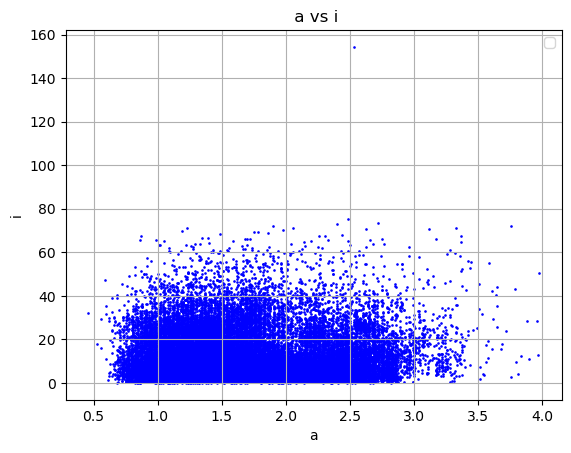

In [895]:
plt300.xlabel("a")
plt300.ylabel("i")
plt300.title(" a vs i")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=0.8, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

#### SemiMajor Axis vs eccentricity

In [897]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [899]:
xs = [obj.PEa for obj in MylistOfSB]
resX = [float(ele) for ele in xs]
ys = [obj.PEe for obj in MylistOfSB]
resY = [float(ele) for ele in ys]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


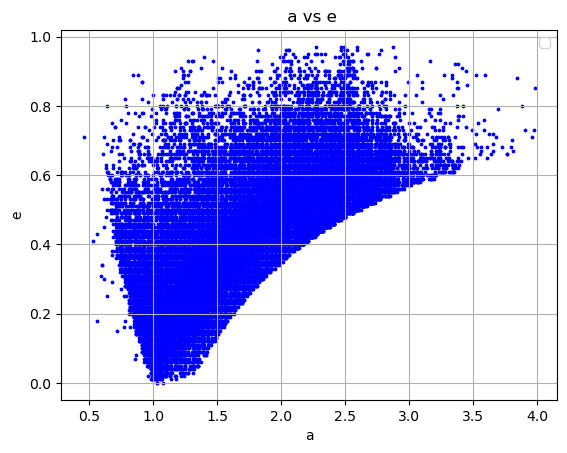

In [901]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
plt300.legend()
# Plot the data points
plt300.scatter(resX, resY, s=3, color='blue', label='Data points')
# Show the plot
plt300.grid(True)
plt300.show()

## 4 Kategorije

In [903]:
MylistOfAmor = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]
MylistOfApollo = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEq) < 1.017 and float(obj.PEa) >1]
MylistOfAtens = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]
MylistOfApohele = [copy.deepcopy(obj) for obj in MylistOfSBTraining if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]

In [904]:
MylistOfAmorTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]
MylistOfApolloTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) < 1.017 and float(obj.PEa) >1]
MylistOfAtensTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]
MylistOfApoheleTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]

In [905]:
countAmor   =len(MylistOfAmor)
countApollo =len(MylistOfApollo)
countAtens  =len(MylistOfAtens)
countApohele=len(MylistOfApohele)
countPocetno=len(MylistOfSB)
countUkupno=countAmor+countApollo+countAtens+countApohele

In [906]:
print ("Pocetni broj NEO tela: "+ str(countPocetno))
print ("Ukupno posle filtracije (a<4 AU) ): "+ str(countUkupno))

Pocetni broj NEO tela: 36501
Ukupno posle filtracije (a<4 AU) ): 18129


### semimajor axis vs eccentricitya sve 4 kategorije

In [908]:
import matplotlib.pyplot as plt300

Convert the data into arrays

In [910]:
xs1 = [obj.PEa for obj in MylistOfAmor]
resX1 = [float(ele) for ele in xs1]
ys1 = [obj.PEe for obj in MylistOfAmor]
resY1 = [float(ele) for ele in ys1]

In [911]:
xs2 = [obj.PEa for obj in MylistOfApollo]
resX2 = [float(ele) for ele in xs2]
ys2 = [obj.PEe for obj in MylistOfApollo]
resY2 = [float(ele) for ele in ys2]

In [912]:
xs3 = [obj.PEa for obj in MylistOfAtens]
resX3 = [float(ele) for ele in xs3]
ys3 = [obj.PEe for obj in MylistOfAtens]
resY3 = [float(ele) for ele in ys3]

In [913]:
xs4 = [obj.PEa for obj in MylistOfApohele]
resX4 = [float(ele) for ele in xs4]
ys4 = [obj.PEe for obj in MylistOfApohele]
resY4 = [float(ele) for ele in ys4]

Add labels and title

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


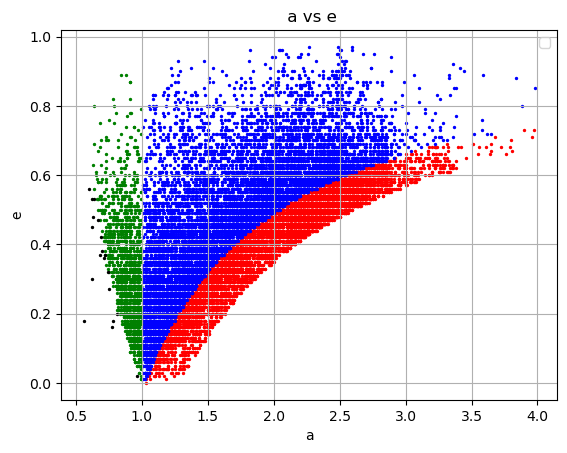

In [915]:
plt300.xlabel("a")
plt300.ylabel("e")
plt300.title(" a vs e")
plt300.legend()
# Plot the data points
##############plt300.scatter(resX, resY, s=3, color='green', label='Data points')
plt300.scatter(resX1, resY1, s=2 ,c='red', label='Amor')
plt300.scatter(resX2, resY2, s=2 ,c='blue', label='Apollo')
plt300.scatter(resX3, resY3, s=2 ,c='green', label='Atens')
plt300.scatter(resX4, resY4, s=2 ,c='black', label='Apohele')
# Show the plot
plt300.grid(True)
plt300.show()

## random forest

# random forest ML 

In [918]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Prepare data

In [920]:
list1 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAmor]
list2 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApollo]
list3 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAtens]
list4 = [(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApohele]

Combine all data into one dataset with labels

Accuracy of the Random Forest Classifier: 98.46%


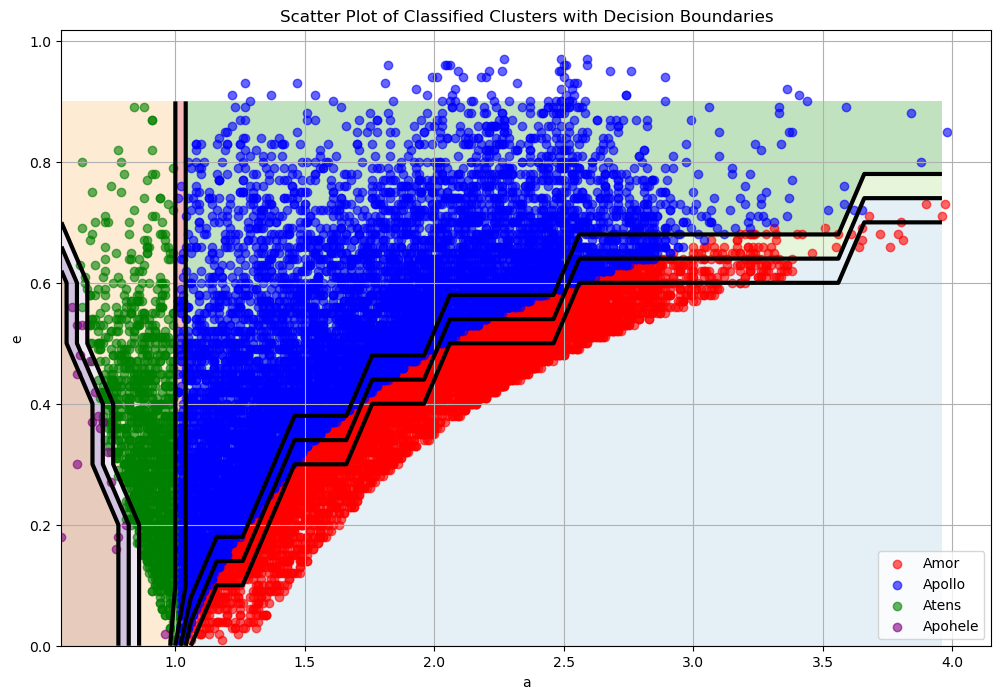

In [922]:
X = np.array(list1 + list2 + list3 + list4)  # Features
y = np.array([0] * len(list1) + [1] * len(list2) + [2] * len(list3) + [3] * len(list4))  # Labels
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Predict on the test set
y_pred = clf.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy * 100:.2f}%")
# Plot decision boundaries and clusters
plt.figure(figsize=(12, 8))
# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() , X[:, 0].max() 
y_min, y_max = X[:, 1].min() , X[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict for each point in the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#### Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.contour(xx, yy, Z, colors='black', linewidths=3)  # Black borders for cluster boundaries
# Scatter plot for each cluster
labels = ['Amor', 'Apollo', 'Atens', 'Apohele']
colors = ['red', 'blue', 'green', 'purple']
for cluster in range(4):
    plt.scatter(
        X[y == cluster, 0],
        X[y == cluster, 1],
        label=f"{labels[cluster]}",
        alpha=0.6,
        color=colors[cluster]
    )
plt.title("Scatter Plot of Classified Clusters with Decision Boundaries")
plt.xlabel("a")
plt.ylabel("e")
plt.legend()
plt.grid(True)
plt.show()

## moja provera preciznosti random foresta

In [924]:
MylistOfAmorTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) > 1.017 and float(obj.PEq) <1.3]
MylistOfApolloTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEq) < 1.017 and float(obj.PEa) >1]
MylistOfAtensTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) >0.983]
MylistOfApoheleTest = [copy.deepcopy(obj) for obj in MylistOfSBTest if float(obj.PEa) < 1 and float(obj.PEQ) < 0.983]

In [925]:
import numpy as np
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAmorTest])
predicted_clusters = clf.predict(points)
# Count the number of points in cluster 0
count_cluster_0 = np.sum(predicted_clusters == 0)
print(f"Number of points in cluster 0: {count_cluster_0}")
print("Length of MylistOfAmorTest is " + str(len(MylistOfAmorTest)))

Number of points in cluster 0: 5960
Length of MylistOfAmorTest is 6135


In [926]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApolloTest])
predicted_clusters = clf.predict(points)
# Count the number of points in cluster 0
count_cluster_1 = np.sum(predicted_clusters == 1)
print(f"Number of points in cluster 1: {count_cluster_1}")
print("Length of MylistOfApolloTest is " + str(len(MylistOfApolloTest)))

Number of points in cluster 1: 10289
Length of MylistOfApolloTest is 10480


In [927]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfAtensTest])
predicted_clusters = clf.predict(points)
# Count the number of points in cluster 0
count_cluster_2 = np.sum(predicted_clusters == 2)
print(f"Number of points in cluster 2: {count_cluster_2}")
print("Length of MylistOfAtensTest is " + str(len(MylistOfAtensTest)))

Number of points in cluster 2: 1518
Length of MylistOfAtensTest is 1519


In [928]:
points = np.array([(float(obj.PEa), float(obj.PEe)) for obj in MylistOfApoheleTest])
predicted_clusters = clf.predict(points)
# Count the number of points in cluster 0
count_cluster_3 = np.sum(predicted_clusters == 3)
print(f"Number of points in cluster 3: {count_cluster_3}")
print("Length of MylistOfApoheleTest is " + str(len(MylistOfApoheleTest)))

Number of points in cluster 3: 10
Length of MylistOfApoheleTest is 17


In [929]:
sumForProcena = count_cluster_0 + count_cluster_1 + count_cluster_2 +count_cluster_3
print("Ukupni broj Tela koji je dobro odreÄ‘en " + str(sumForProcena) )
print("Ukupan broj tela za testiranje je " + str(len(MylistOfSBTest)))

Ukupni broj Tela koji je dobro odreÄ‘en 17777
Ukupan broj tela za testiranje je 18251


In [930]:
print (" Tacnost procene je "+ str (float (sumForProcena /len(MylistOfSBTest)) ) )

 Tacnost procene je 0.9740288203386116
